In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

img = cv2.imread("../Images/Elephant_2.jpg", 1)

h = 30
hColor = 30

templateWindowSize = 7
searchWindowSize = 21
'''
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

blur = cv2.fastNlMeansDenoisingColored(img, None, h, hColor, templateWindowSize, searchWindowSize)
'''

lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(img)

cv2.imshow("l_channel",l)
cv2.waitKey()
cv2.imshow("a_channel",a)
cv2.waitKey()
cv2.imshow("b_channel",b)
cv2.waitKey()





#plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
blur = cv2.fastNlMeansDenoisingColored(lab, None, h, hColor, templateWindowSize, searchWindowSize)
#plt.imshow(lab)

print('done')

done


In [3]:
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(l)
cv2.imshow('CLAHE output', cl)
cv2.waitKey()

limg = cv2.merge((cl,a,b))
cv2.imshow('limg', limg)
cv2.waitKey()

-1

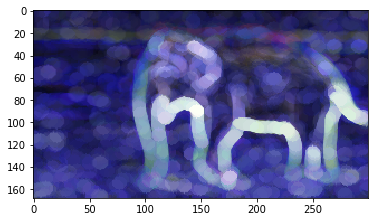

In [5]:
elKernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (13,13))

gradient = cv2.morphologyEx(limg, cv2.MORPH_GRADIENT, elKernel)

plt.imshow(cv2.cvtColor(gradient, cv2.COLOR_BGR2RGB))

In [7]:
gradient = cv2.cvtColor(gradient, cv2.COLOR_BGR2GRAY)

otsu = cv2.threshold(gradient, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

closingKernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (33,33))
close = cv2.morphologyEx(otsu, cv2.MORPH_CLOSE, closingKernel)

cv2.imshow("close",close)
cv2.waitKey()

-1

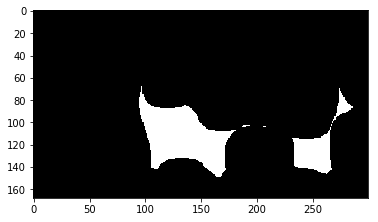

In [7]:
eroded = cv2.erode(close, None, iterations = 6)

plt.imshow(eroded, cmap='gray')